### Todos:
### 1. preprocess the data to make it suitable for glove embeding:
### a. remove ' from words( don't -> dont)
### b. convert all letters to lowercase ( Hoping -> hoping)
### 2. find the frequency of each emoji to see if the dataset is balanced and balance the dataset(important)

In [0]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt

In [0]:
torch.cuda.is_available()

True

In [0]:
import pandas

In [0]:
def get_data():
    header = ['tweet','label']
    data_set = pandas.read_csv('augmented_data.txt',delimiter='\t',names = header)
    return data_set

# def get_label_mapping():
#     original_list = interesting_labels.wanted_list
#     output_list = [i for i in range(len(original_list))]
#     return dict(zip(original_list,output_list))
  
def split_tweet(tweet):
    return tweet.split()    


In [0]:
data_set = get_data()

In [0]:
glove = torchtext.vocab.GloVe(name="twitter.27B",dim=50)

.vector_cache/glove.twitter.27B.zip: 1.52GB [00:34, 44.0MB/s]                            
100%|█████████▉| 1193272/1193514 [00:35<00:00, 34000.60it/s]

In [0]:
len(data_set)

169129

In [0]:
type(data_set['tweet'][0])

str

In [0]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,i feel like a baby kangaroo stuck in its mothe...,1
3,girl ppl should be happy i even remembered her...,0
4,"oh , the irony if misha wins the choice tv sc...",2
5,"oh , the irony if misha wins the choice tv sc...",2
6,"oh , the irony if misha wins the choice tv sc...",2
7,"oh , the irony if misha wins the choice tv sc...",2
8,"oh , the irony if misha wins the choice tv sc...",2
9,"oh , the irony if misha wins the choice tv sc...",2


In [0]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,i feel like a baby kangaroo stuck in its mothe...,1
3,girl ppl should be happy i even remembered her...,0
4,"oh , the irony if misha wins the choice tv sc...",2
5,"oh , the irony if misha wins the choice tv sc...",2
6,"oh , the irony if misha wins the choice tv sc...",2
7,"oh , the irony if misha wins the choice tv sc...",2
8,"oh , the irony if misha wins the choice tv sc...",2
9,"oh , the irony if misha wins the choice tv sc...",2


In [0]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,girl ppl should be happy i even remembered her...,0
3,"oh , the irony if misha wins the choice tv sc...",2
4,"i miss you to , you so fake now",2
5,"i miss you to , you so fake now",4
6,i know,1
7,bacolod please ? !,0
8,things can change so quickly,1
9,all me &amp ; vic do is laugh . . anybody o...,1


In [0]:
def get_tweet_words(glove_vector):
    train, valid, test = [],[],[]
    for i in range(len(data_set)):
        tweet = data_set['tweet'][i]
        if(type(tweet) != str):
            continue
        idxs = [glove_vector.stoi[w]        # lookup the index of word
                for w in split_tweet(tweet)
                if w in glove_vector.stoi] # keep words that has an embedding
        if not idxs: # ignore tweets without any word with an embedding
            continue
        idxs = torch.tensor(idxs) # convert list to pytorch tensor
        label = torch.tensor(data_set['label'][i]).long()
        if i % 5 < 3:
            train.append((idxs, label))
        elif i % 5 == 4:
            valid.append((idxs, label))
        else:
            test.append((idxs, label))
    return train, valid, test

In [0]:
train, valid, test = get_tweet_words(glove)

In [0]:
num_classes = len(set([element[1].item() for element in train]))
num_classes

6

In [0]:
train[0]

(tensor([3653,   10,  348, 6456,   85,   53, 2706]), tensor(0))

In [0]:
valid[0]

(tensor([   193,      4,     13,  19020,     74,  38178,   3389,     13,    879,
            703,   4200, 116746,   3094,      1]), tensor(2))

In [0]:
len(train)

100851

### Recurrent Neural Network Module

In [0]:
rnn_layer = nn.RNN(input_size=50,    # dimension of the input repr
                   hidden_size=50,   # dimension of the hidden units
                   batch_first=True) # input format is [batch_size, seq_len, repr_dim]

In [0]:
tweet_input = tweet_emb.unsqueeze(0) # add the batch_size dimension
h0 = torch.zeros(1, 1, 50)     # initial hidden layer
out, last_hidden = rnn_layer(tweet_input, h0)

NameError: ignored

In [0]:
print(out.shape)
print(last_hidden.shape)

NameError: ignored

In [0]:
out[:,-1,:]

NameError: ignored

### Building the model

In [0]:
class TweetRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetRNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

model = TweetRNN(input_size=50, hidden_size=50, num_classes=num_classes)

In [0]:
data_set.nunique()

tweet    42397
label        6
dtype: int64

In [0]:
import random

class TweetBatcher:
    def __init__(self, tweets, batch_size=32, drop_last=False):
        # store tweets by length
        self.tweets_by_length = {}
        for words, label in tweets:
            # compute the length of the tweet
            wlen = words.shape[0]
            # put the tweet in the correct key inside self.tweet_by_length
            if wlen not in self.tweets_by_length:
                self.tweets_by_length[wlen] = []
            self.tweets_by_length[wlen].append((words, label),)
         
        #  create a DataLoader for each set of tweets of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    tweets,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, tweets in self.tweets_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every tweet length
        iters = [iter(loader) for loader in self.loaders.values()]
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [0]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return float(correct) / float(total)

test_loader = TweetBatcher(test, batch_size=32, drop_last=False)
get_accuracy(model, test_loader)


0.16490152912476944

In [0]:
for i, (tweets, labels) in enumerate(TweetBatcher(train, drop_last=True)):
    print(tweets.shape, labels.shape)
print(i)

In [0]:
for i in range(10):
    model = TweetRNN(input_size=50, hidden_size=50, num_classes=num_classes)
    train_loader = TweetBatcher(train, batch_size=32, drop_last=False)
    print(get_accuracy(model, train_loader))

0.16487689760141197
0.16441086355117945
0.1677821737017977
0.17334483545031779
0.16550158154108535
0.1688927229278837
0.15863005820467818
0.16588829064659746
0.14736591605437724
0.16573955637524665


In [0]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for tweets, labels in train:
            optimizer.zero_grad()
            pred = model(tweets)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
#         print("Epoch %d; Loss %f; Train Acc %f;" % (
#               epoch+1, loss, train_acc[-1]))
        
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Loss 1.614135; Train Acc 0.289158;
Epoch 2; Loss 1.597014; Train Acc 0.305832;
Epoch 3; Loss 1.506562; Train Acc 0.310439;
Epoch 4; Loss 1.602138; Train Acc 0.314028;
Epoch 5; Loss 1.679015; Train Acc 0.328766;
Epoch 6; Loss 1.501785; Train Acc 0.345871;
Epoch 7; Loss 1.516341; Train Acc 0.365899;
Epoch 8; Loss 1.486886; Train Acc 0.378499;
Epoch 9; Loss 1.404854; Train Acc 0.396568;
Epoch 10; Loss 1.428442; Train Acc 0.399540;
Epoch 11; Loss 1.256251; Train Acc 0.411289;
Epoch 12; Loss 1.478969; Train Acc 0.412870;
Epoch 13; Loss 1.344500; Train Acc 0.425703;
Epoch 14; Loss 1.233262; Train Acc 0.428933;
Epoch 15; Loss 1.155723; Train Acc 0.443264;
Epoch 16; Loss 1.309067; Train Acc 0.450878;
Epoch 17; Loss 1.360913; Train Acc 0.461297;
Epoch 18; Loss 1.154996; Train Acc 0.459020;
Epoch 19; Loss 1.227623; Train Acc 0.474987;
Epoch 20; Loss 1.172024; Train Acc 0.474735;
Epoch 21; Loss 1.152427; Train Acc 0.474909;
Epoch 22; Loss 1.266695; Train Acc 0.481751;
Epoch 23; Loss 1.19

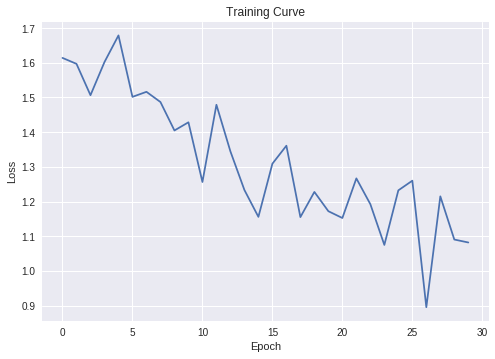

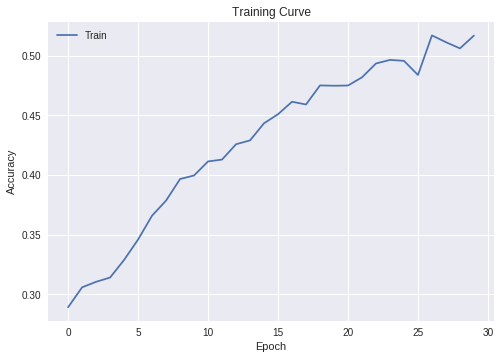

In [0]:
model = TweetRNN(input_size=50, hidden_size=100, num_classes=num_classes)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
# valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, train_loader, num_epochs=30, learning_rate=2e-4)
# get_accuracy(model, test_loader)

Epoch 1; Loss 1.698094; Train Acc 0.276620; Val Acc 0.278008
Epoch 2; Loss 1.711447; Train Acc 0.287975; Val Acc 0.288868
Epoch 3; Loss 1.611302; Train Acc 0.299771; Val Acc 0.301157
Epoch 4; Loss 1.639200; Train Acc 0.309112; Val Acc 0.308477
Epoch 5; Loss 1.626242; Train Acc 0.313332; Val Acc 0.311483
Epoch 6; Loss 1.579443; Train Acc 0.319867; Val Acc 0.319814
Epoch 7; Loss 1.571667; Train Acc 0.322903; Val Acc 0.322611
Epoch 8; Loss 1.704386; Train Acc 0.334910; Val Acc 0.332044
Epoch 9; Loss 1.616832; Train Acc 0.346687; Val Acc 0.343262
Epoch 10; Loss 1.631520; Train Acc 0.354133; Val Acc 0.351177
Epoch 11; Loss 1.641594; Train Acc 0.367573; Val Acc 0.363972
Epoch 12; Loss 1.646301; Train Acc 0.374830; Val Acc 0.369625
Epoch 13; Loss 1.490233; Train Acc 0.389883; Val Acc 0.384950
Epoch 14; Loss 1.508592; Train Acc 0.394193; Val Acc 0.388610
Epoch 15; Loss 1.424087; Train Acc 0.398132; Val Acc 0.392240
Epoch 16; Loss 1.392047; Train Acc 0.414128; Val Acc 0.407594
Epoch 17; Loss 1.

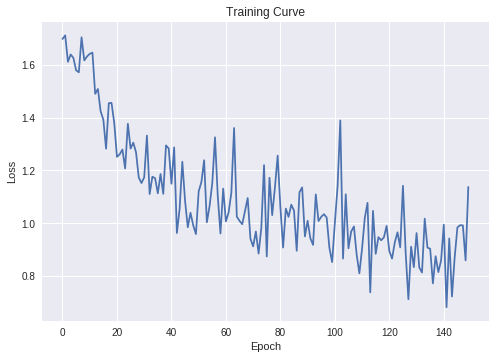

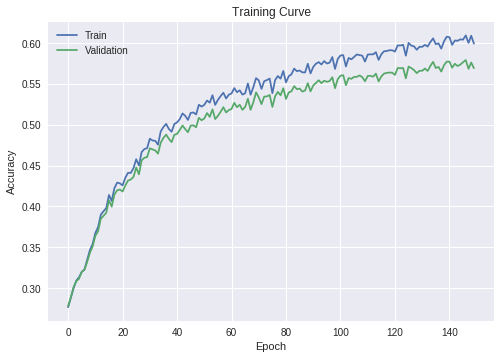

0.5700303444993158

In [0]:
#THIS IS THE MODEL WHOSE RESULTS WERE REPORTED ON THE PROGRESS REPORT

model = TweetRNN(input_size=50, hidden_size=100, num_classes=num_classes)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
test_loader = TweetBatcher(test, batch_size=32, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=150, learning_rate=2e-4)
get_accuracy(model, test_loader)

In [0]:
model_1 = TweetRNN(input_size=50, hidden_size=50, num_classes=num_classes)
train_loader = TweetBatcher(train, batch_size=32, drop_last=True)
# valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, train_loader, num_epochs=150, learning_rate=2e-4)
# get_accuracy(model, test_loader)


### LSTM Model

In [0]:
class TweetLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetLSTM, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

In [0]:
model_lstm_2 = TweetLSTM(input_size=50, hidden_size=100, num_classes=num_classes)
train_rnn_network(model, train_loader, train_loader, num_epochs=150, learning_rate=2e-4)
# get_accuracy(model, test_loader)

In [0]:
model_lstm = TweetLSTM(input_size=50, hidden_size=50, num_classes=num_classes)
train_rnn_network(model, train_loader, train_loader, num_epochs=150, learning_rate=2e-4)
# get_accuracy(model, test_loader)